In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./books.csv", sep=",", on_bad_lines="skip", index_col="bookID")

In [3]:
df

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


## 1. Data Preparation Stage

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6     num_pages         11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [5]:
df.rename({"  num_pages": "num_pages"}, axis=1, inplace=True)

In [6]:
df.nunique()

title                 10348
authors                6639
average_rating          209
isbn                  11123
isbn13                11123
language_code            27
num_pages               997
ratings_count          5294
text_reviews_count     1822
publication_date       3679
publisher              2290
dtype: int64

#### !!! Above result gives us 10348 unique book titles, while the dataset includes 11123 books in total !!!
This is addressed and taken into account during the Fine-Tuning stage.

In [7]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [8]:
df["publication_date"] = pd.to_datetime(df["publication_date"], format="%m/%d/%Y", errors="coerce")

In [9]:
df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64

We immediately remove the new null values caused by the datetime transformation.

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

We can group the regional (and "enm" as Middle English) English language codes as a whole under "eng".

In [12]:
df.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [13]:
df["language_code"] = df["language_code"].replace(['en-US', 'en-GB', 'en-CA', 'enm'], "eng")

C:\Users\Kaan\AppData\Local\Temp\ipykernel_27416\3119981532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language_code"] = df["language_code"].replace(['en-US', 'en-GB', 'en-CA', 'enm'], "eng")


In [14]:
df.language_code.unique()

array(['eng', 'fre', 'spa', 'mul', 'grc', 'ger', 'jpn', 'ara', 'nl',
       'zho', 'lat', 'por', 'srp', 'ita', 'rus', 'msa', 'glg', 'wel',
       'swe', 'nor', 'tur', 'gla', 'ale'], dtype=object)

In [15]:
df.language_code.value_counts()

language_code
eng    10539
spa      218
fre      143
ger       99
jpn       46
mul       19
zho       14
grc       11
por       10
ita        5
lat        3
rus        2
swe        2
ara        1
nl         1
srp        1
msa        1
glg        1
wel        1
nor        1
tur        1
gla        1
ale        1
Name: count, dtype: int64

There are books with zero number of pages. Below, we replace these zero values with the mean page numbers with respect to the language that the book is in.

In [16]:
df.loc[df["num_pages"] == 0]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,2005-01-01,Moody Publishers
2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,2003-01-01,Tantor Media
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,2006-10-03,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,2003-10-01,Simon & Schuster Audio
4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,2006-03-28,Random House Audio
...,...,...,...,...,...,...,...,...,...,...,...
40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,2005-01-01,Tantor Media
41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,1995-11-19,Random House Value Publishing
43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,1999-12-01,Simon & Schuster Audio


There 76 such books. Considering the size of our dataset, it should be safe to drop these rows without significantly affecting model performance.

In [17]:
df = df.drop(df[df["num_pages"] == 0].index)

We now drop the rows with the entry "NOT A BOOK" in the Authors column.

In [18]:
df.loc[df["authors"] == "NOT A BOOK"]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,0563388692,9780563388692,eng,2,3,0,1996-04-01,BBC Physical Audio
19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,0563388544,9780563388548,eng,2,0,0,2005-03-30,BBC Physical Audio
19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,0563388323,9780563388326,eng,2,2,0,1995-10-02,BBC Physical Audio


In [19]:
df = df.drop(df[df["authors"] == "NOT A BOOK"].index)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11042 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11042 non-null  object        
 1   authors             11042 non-null  object        
 2   average_rating      11042 non-null  float64       
 3   isbn                11042 non-null  object        
 4   isbn13              11042 non-null  int64         
 5   language_code       11042 non-null  object        
 6   num_pages           11042 non-null  int64         
 7   ratings_count       11042 non-null  int64         
 8   text_reviews_count  11042 non-null  int64         
 9   publication_date    11042 non-null  datetime64[ns]
 10  publisher           11042 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 1.0+ MB


## 2. EDA Stage

<function matplotlib.pyplot.show(close=None, block=None)>

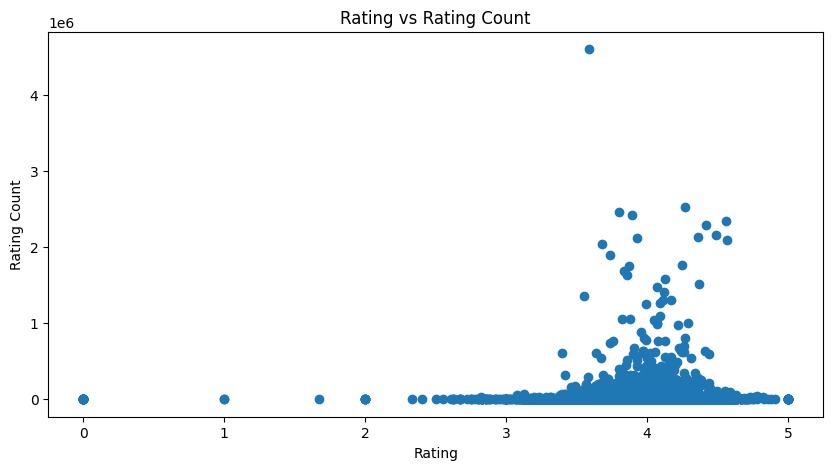

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(df.average_rating, df.ratings_count)
plt.title("Rating vs Rating Count")
plt.xlabel("Rating")
plt.ylabel("Rating Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

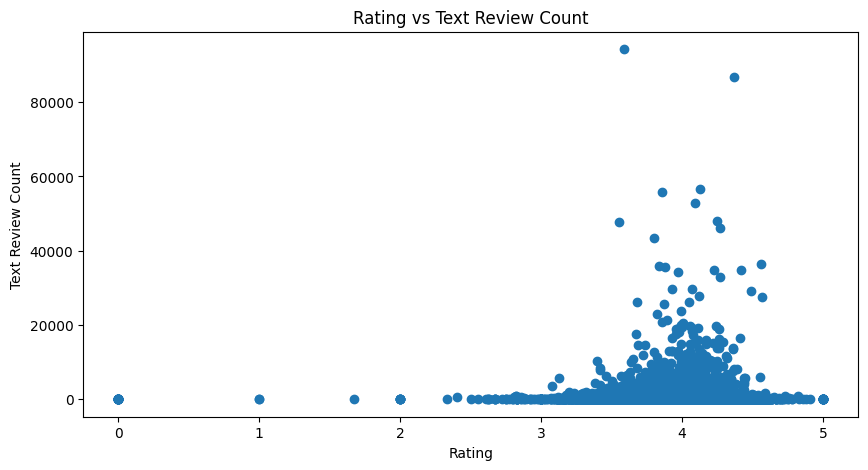

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(df.average_rating, df.text_reviews_count)
plt.title("Rating vs Text Review Count")
plt.xlabel("Rating")
plt.ylabel("Text Review Count")
plt.show

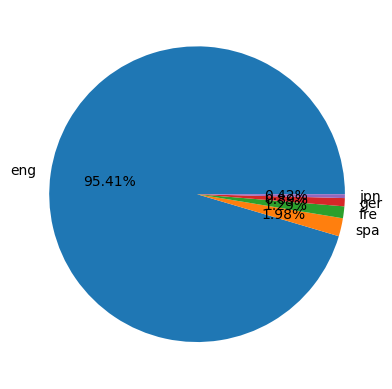

In [23]:
plt.pie(df.language_code.value_counts().nlargest(5),labels=df.language_code.value_counts().nlargest(5).index,autopct='%1.2f%%')
plt.show()

<Axes: xlabel='average_rating', ylabel='Count'>

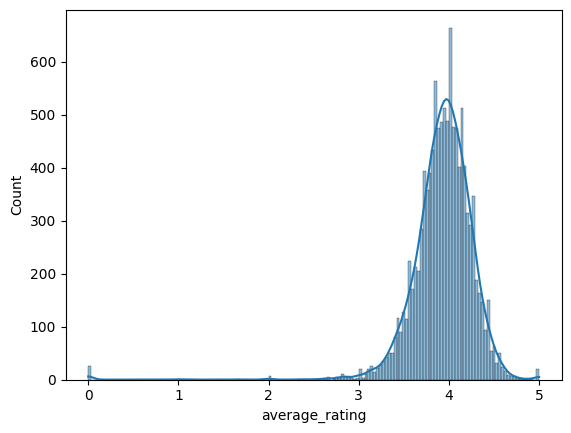

In [24]:
sns.histplot(df.average_rating, kde=True)

<Axes: xlabel='ratings_count', ylabel='Count'>

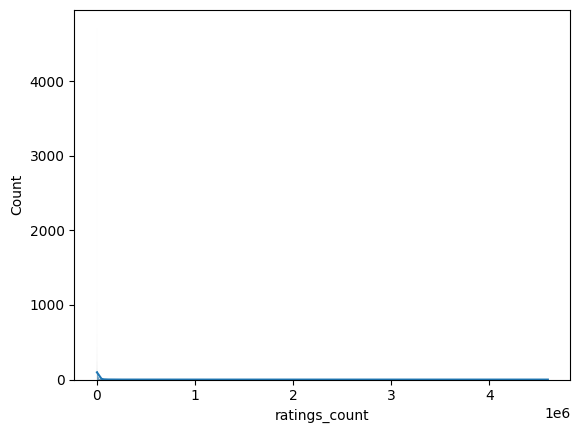

In [25]:
sns.histplot(df.ratings_count, kde=True)

<Axes: xlabel='text_reviews_count', ylabel='Count'>

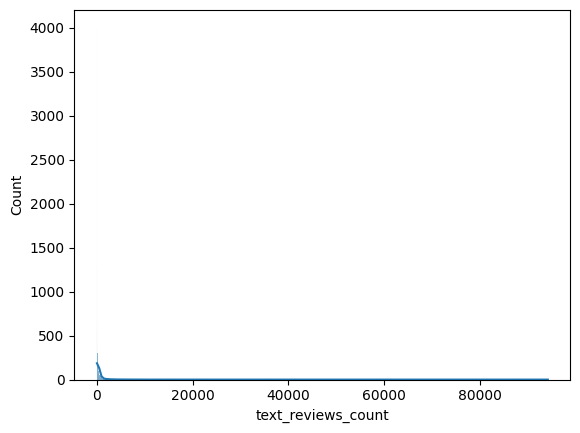

In [26]:
sns.histplot(df.text_reviews_count, kde=True)

Below are some visualizations of top 10 books with respect to different criteria.

In [27]:
top10_books = df.sort_values(by="average_rating", ascending=False).head(10)

C:\Users\Kaan\AppData\Local\Temp\ipykernel_27416\1679873439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="average_rating", y="title", data=top10_books, palette="mako")


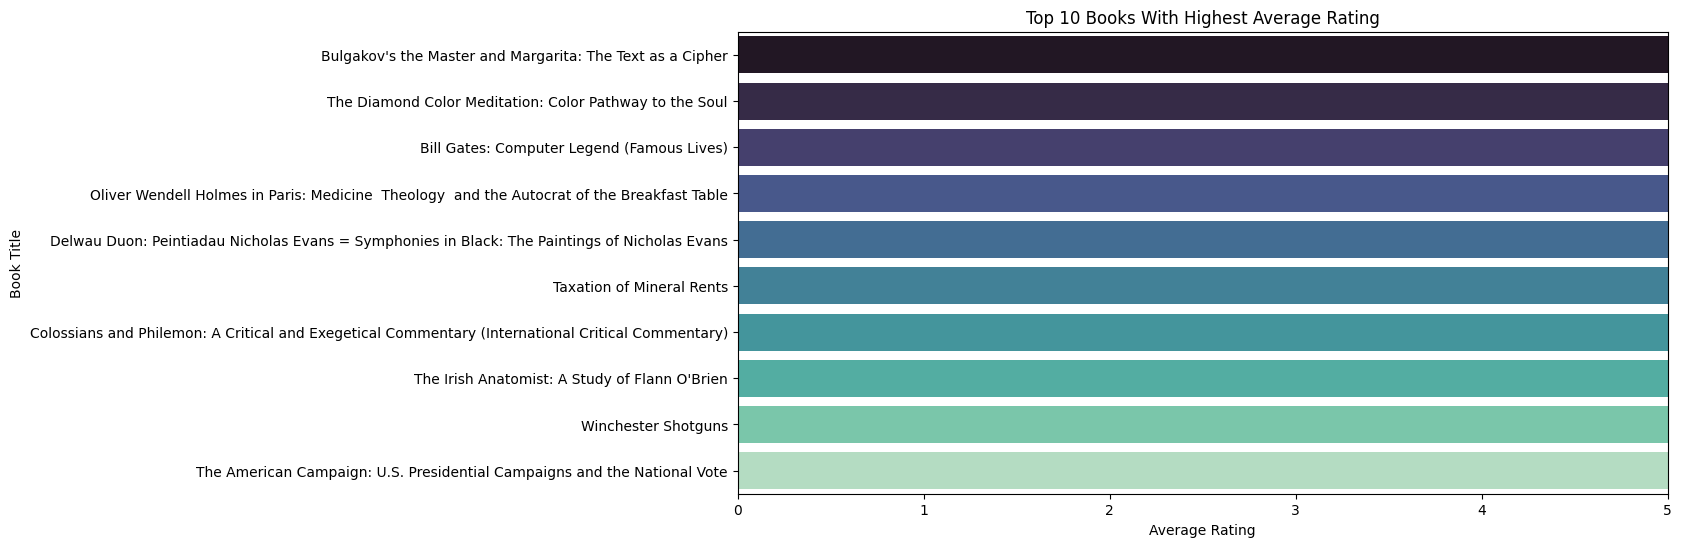

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x="average_rating", y="title", data=top10_books, palette="mako")
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
plt.title("Top 10 Books With Highest Average Rating")
plt.xlim(0, 5)
plt.show()

In [29]:
top10_ratingcount = df.sort_values(by="ratings_count", ascending=False).head(10)

C:\Users\Kaan\AppData\Local\Temp\ipykernel_27416\3418964319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ratings_count", y="title", data=top10_ratingcount, palette="crest")


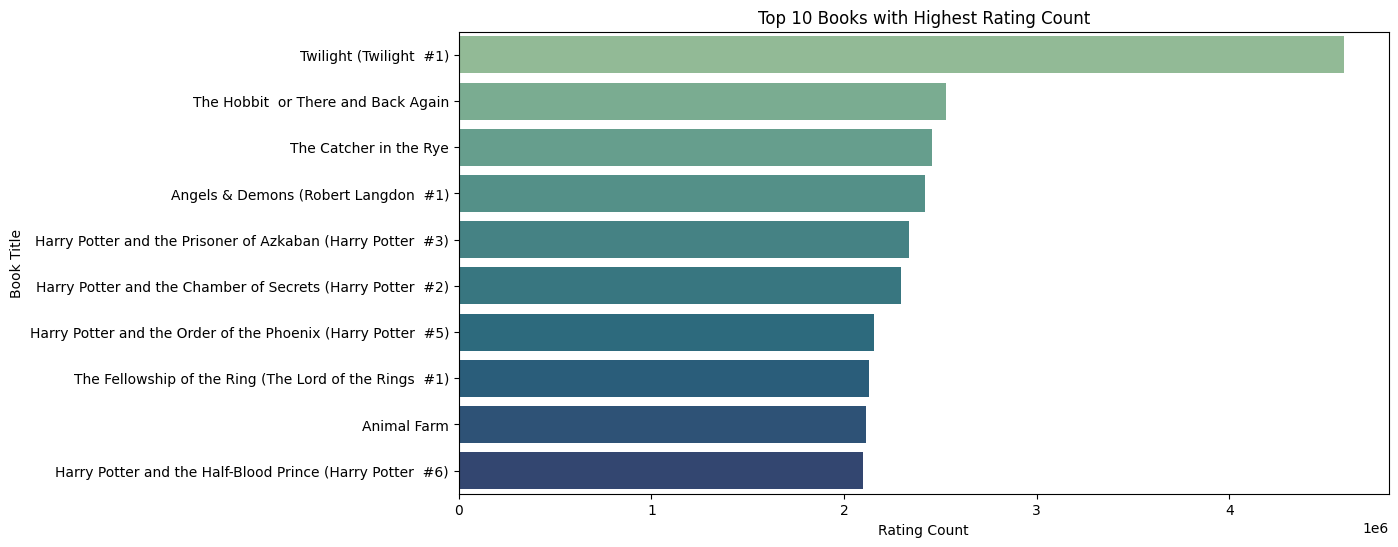

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x="ratings_count", y="title", data=top10_ratingcount, palette="crest")
plt.xlabel("Rating Count")
plt.ylabel("Book Title")
plt.title("Top 10 Books with Highest Rating Count")
plt.show()

In [31]:
top10_textreviewcount = df.sort_values(by="text_reviews_count", ascending=False).head(10)

C:\Users\Kaan\AppData\Local\Temp\ipykernel_27416\2751164383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="text_reviews_count", y="title", data=top10_textreviewcount, palette="viridis")


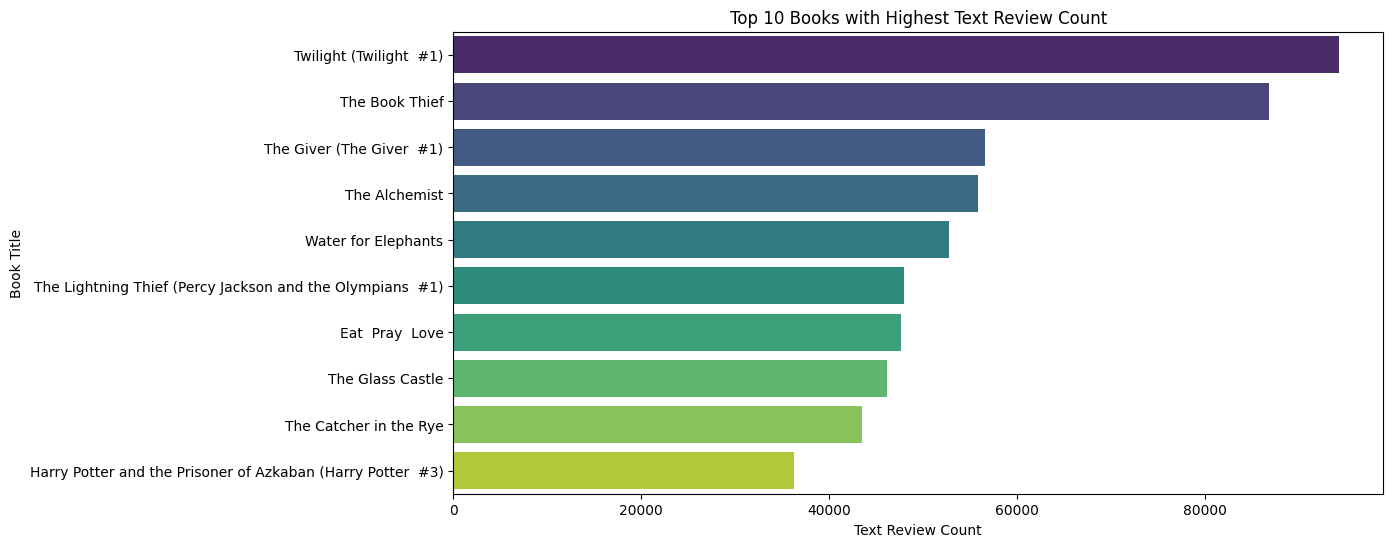

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x="text_reviews_count", y="title", data=top10_textreviewcount, palette="viridis")
plt.xlabel("Text Review Count")
plt.ylabel("Book Title")
plt.title("Top 10 Books with Highest Text Review Count")
plt.show()

In [33]:
top10_longest = df.sort_values(by="num_pages", ascending=False).head(10)

C:\Users\Kaan\AppData\Local\Temp\ipykernel_27416\3355890543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="num_pages", y="title", data=top10_longest, palette="flare")


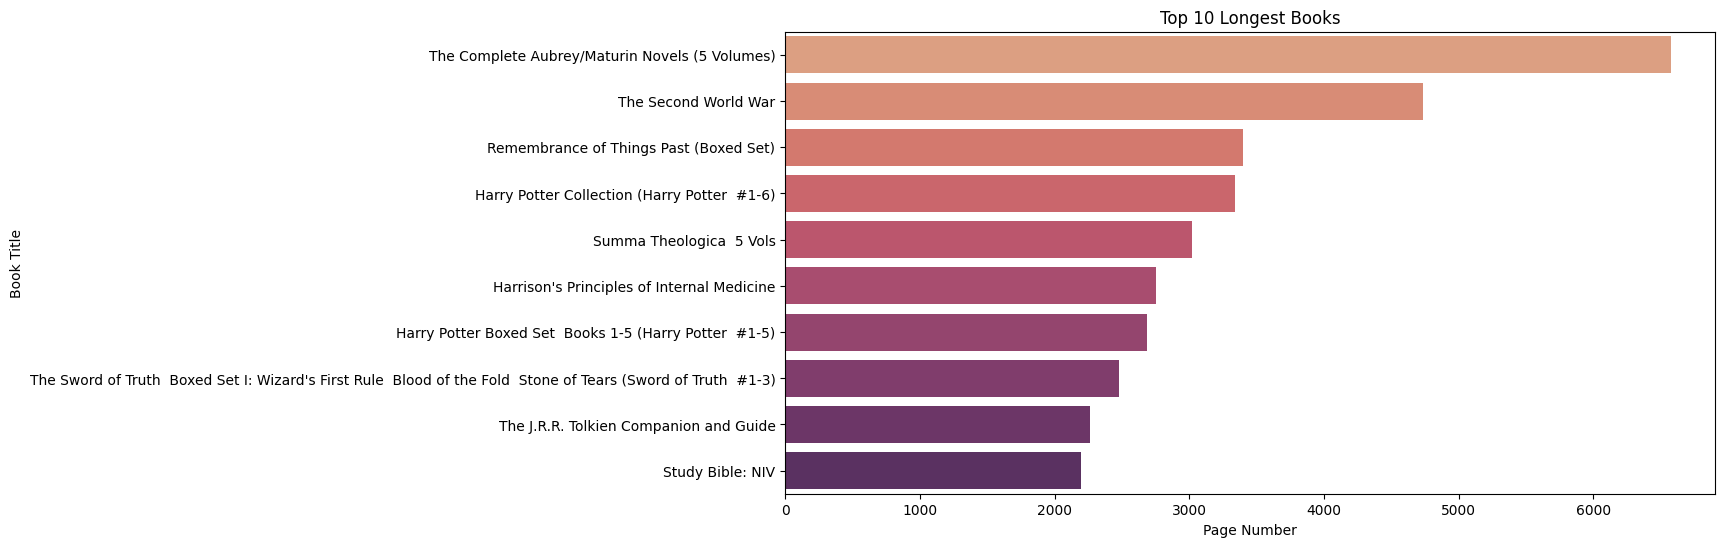

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x="num_pages", y="title", data=top10_longest, palette="flare")
plt.xlabel("Page Number")
plt.ylabel("Book Title")
plt.title("Top 10 Longest Books")
plt.show()

## 3. Feature Engineering Stage

We first need to transform the language column data to numeric.

In [35]:
df["language_code"] = pd.factorize(df["language_code"])[0]

In order to transform the publication date column to numeric values, we can extract the year of a book's publication (also since it is the most relevant to us).

In [36]:
df["publication_date"] = pd.to_datetime(df["publication_date"]).dt.year

In [37]:
df_processed = df.drop(columns=["title", "authors", "isbn", "isbn13", "publisher"])

In [38]:
df_processed

,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date
bookID,,,,,,
1,4.57,0,652,2095690,27591,2006
2,4.49,0,870,2153167,29221,2004
4,4.42,0,352,6333,244,2003
5,4.56,0,435,2339585,36325,2004
8,4.78,0,2690,41428,164,2004
...,...,...,...,...,...,...
45631,4.06,0,512,156,20,2004
45633,4.08,0,635,783,56,1988
45634,3.96,0,415,820,95,1993


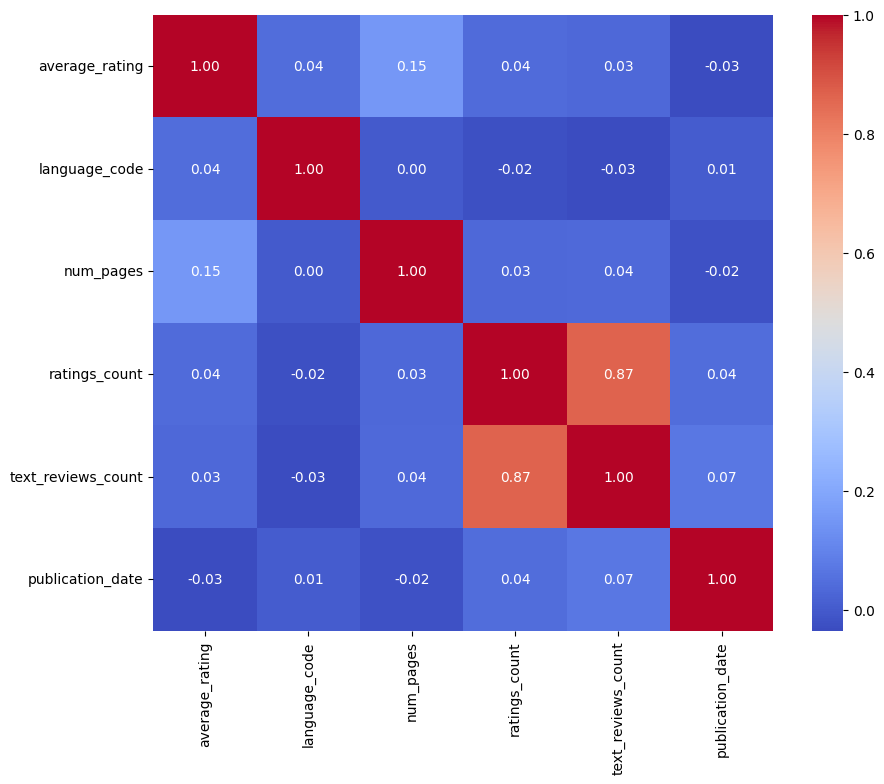

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df_processed.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## 4. Modeling Stage

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
df_train, df_test = train_test_split(df_processed, test_size=0.20, random_state=42)

In [42]:
print(len(df_processed))
print(len(df_train))
print(len(df_test))

11042
8833
2209


In [43]:
X_train = df_train.drop("average_rating", axis=1)
y_train = df_train["average_rating"]

In [44]:
X_test = df_test.drop("average_rating", axis=1)
y_test = df_test["average_rating"]

Since our aim is to predict a float value between 0 and 5, Regressor models are our best choices.

In [45]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
models = {"LinearRegression": LinearRegression(),
             "DecisionTree": DecisionTreeRegressor(random_state=42), "RandomForest": RandomForestRegressor(random_state=42),
             "GradientBoosting": GradientBoostingRegressor(random_state=42),
             "KNeighbors": KNeighborsRegressor()}

In [47]:
results = {}
mean_sq_error = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_predicted = np.round(model.predict(X_test), 2)
    score = r2_score(y_test, y_predicted)
    error = np.sqrt(mean_squared_error(y_test, y_predicted))
    results[name] = score
    mean_sq_error[name] = error

In [48]:
print(results.values())
print(mean_sq_error.values())

dict_values([0.02797054261915699, -0.5642721312335328, 0.10214538317383848, 0.18262676787549703, -0.09455041215495963])
dict_values([np.float64(0.3505802601213898), np.float64(0.44473765289258727), np.float64(0.3369385912968644), np.float64(0.32148295472163135), np.float64(0.3720194361078598)])


C:\Users\Kaan\AppData\Local\Temp\ipykernel_27416\3017961657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.values()), y=list(results.keys()), palette='viridis')


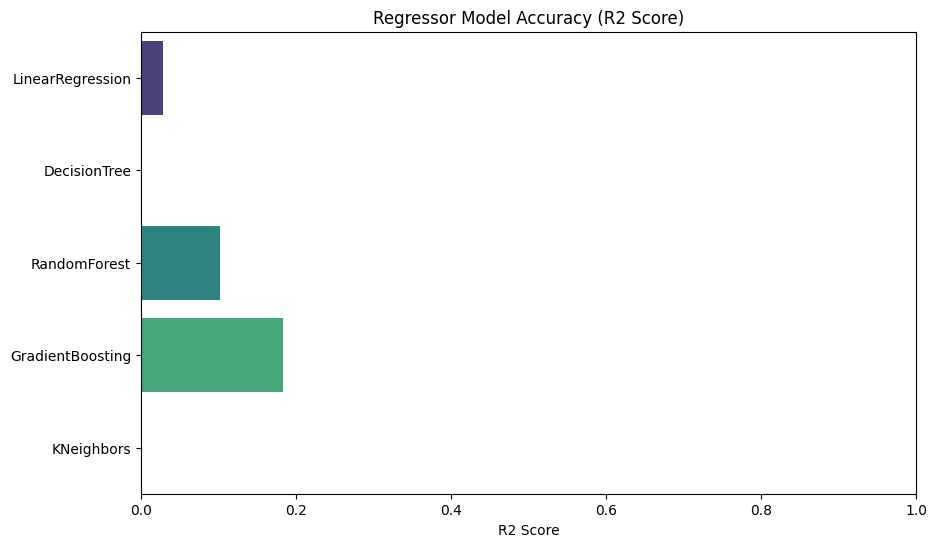

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.values()), y=list(results.keys()), palette='viridis')
plt.xlabel('R2 Score')
plt.title('Regressor Model Accuracy (R2 Score)')
plt.xlim(0, 1)
plt.show()

As can be seen from above plot, the models performed poorly. We can go back to the Feature Engineering stage and add new feature to improve performance.

### 5. Fine-Tuning Stage

Let's "copy" our dataframe with a different name.

In [50]:
df2 = df

Recall that in the data preparation stage, we noticed that the number of UNIQUE book titles is lower than total number of books in the dataset. So, we can see the number of times a book is entered in the dataset. These different occurences are most likely caused by:
1. Different language of the book
2. Different publisher
3. Different edition
4. Multiple Authors (editors, translators)

Hence, we add a new column to our dataframe that stores the number of occurences each unique book has in total with the below code.

In [51]:
df2["occurence_count"] = df2.groupby("title")["title"].transform("count")

In [52]:
df2.occurence_count.value_counts(ascending=True)

occurence_count
8      16
9      18
7      28
6      66
5      95
4     120
3     225
2     670
1    9804
Name: count, dtype: int64

By above, we can see that, for example, 18 books can be seen in 9 different rows.

Next we add new features. Namely, we do four multiplications by the average rating of each book with their occurence count, rating and text review count, and page number respectively to get four total new columns in our dataframe to feed into our models.

In [53]:
df2["occ_weighted"] = df2["average_rating"] * df2["occurence_count"]

In [54]:
df2["rating_count_weighted"] = df2["average_rating"] * df2["ratings_count"]
df2["text_review_count_weighted"] = df2["average_rating"] * df2["text_reviews_count"]

In [55]:
df2["page_weighted"] = df2["average_rating"] * df2["num_pages"]

In [56]:
df2

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,occurence_count,occ_weighted,rating_count_weighted,text_review_count_weighted,page_weighted
bookID,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,0,652,2095690,27591,2006,Scholastic Inc.,2,9.14,9577303.30,126090.87,2979.64
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,0,870,2153167,29221,2004,Scholastic Inc.,1,4.49,9667719.83,131202.29,3906.30
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,0,352,6333,244,2003,Scholastic,2,8.84,27991.86,1078.48,1555.84
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,0,435,2339585,36325,2004,Scholastic Inc.,2,9.12,10668507.60,165642.00,1983.60
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,0,2690,41428,164,2004,Scholastic,1,4.78,198025.84,783.92,12858.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,0,512,156,20,2004,Da Capo Press,1,4.06,633.36,81.20,2078.72
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,0,635,783,56,1988,Penguin Books,1,4.08,3194.64,228.48,2590.80
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,0,415,820,95,1993,Penguin Books,1,3.96,3247.20,376.20,1643.40


After dropping non-numeric columns, the dataframe is ready to be fitted into the models again.

In [57]:
df2_processed = df2.drop(columns=["title", "authors", "isbn", "isbn13", "publisher"])

In [58]:
df2_processed

,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,occurence_count,occ_weighted,rating_count_weighted,text_review_count_weighted,page_weighted
bookID,,,,,,,,,,,
1,4.57,0,652,2095690,27591,2006,2,9.14,9577303.30,126090.87,2979.64
2,4.49,0,870,2153167,29221,2004,1,4.49,9667719.83,131202.29,3906.30
4,4.42,0,352,6333,244,2003,2,8.84,27991.86,1078.48,1555.84
5,4.56,0,435,2339585,36325,2004,2,9.12,10668507.60,165642.00,1983.60
8,4.78,0,2690,41428,164,2004,1,4.78,198025.84,783.92,12858.20
...,...,...,...,...,...,...,...,...,...,...,...
45631,4.06,0,512,156,20,2004,1,4.06,633.36,81.20,2078.72
45633,4.08,0,635,783,56,1988,1,4.08,3194.64,228.48,2590.80
45634,3.96,0,415,820,95,1993,1,3.96,3247.20,376.20,1643.40


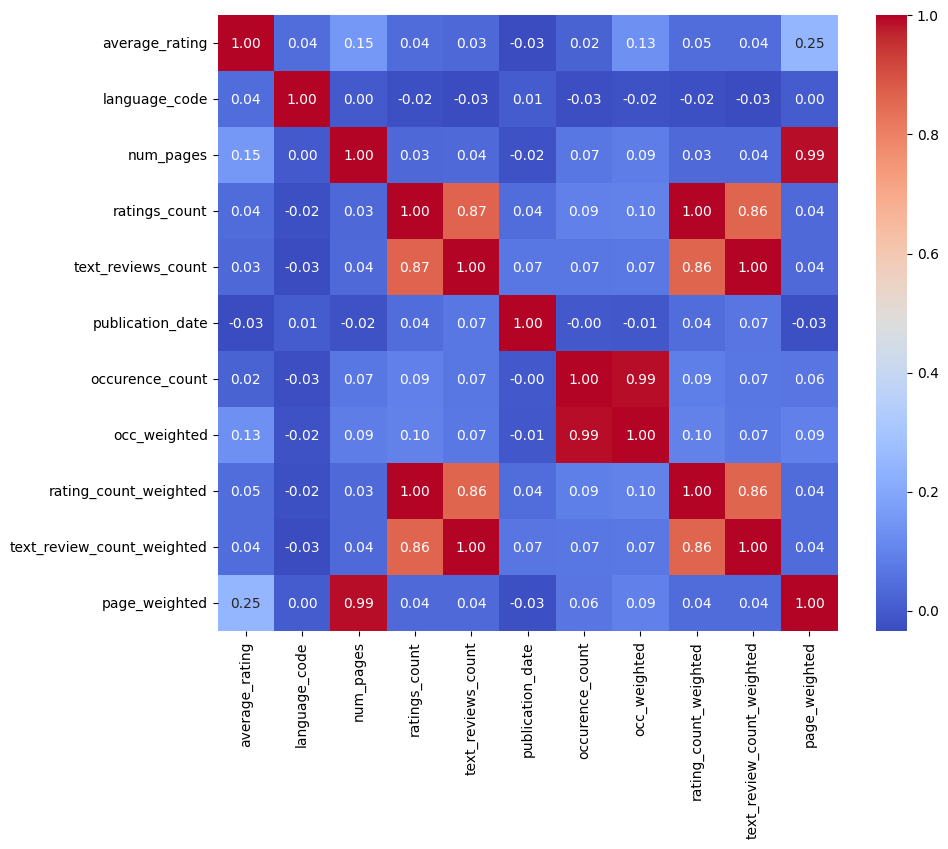

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(df2_processed.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [60]:
df2_train, df2_test = train_test_split(df2_processed, test_size=0.20, random_state=42)

X_train2 = df2_train.drop("average_rating", axis=1)
y_train2 = df2_train["average_rating"]

X_test2 = df2_test.drop("average_rating", axis=1)
y_test2 = df2_test["average_rating"]

In [61]:
print(len(df2_processed))
print(len(X_train2))
print(len(X_test2))

11042
8833
2209


In [62]:
results2 = {}
mean_sq_error2 = {}

for name, model in models.items():
    model.fit(X_train2, y_train2)
    y_predicted = np.round(model.predict(X_test2),2)
    score = r2_score(y_test2, y_predicted)
    error = np.sqrt(mean_squared_error(y_test2, y_predicted))
    results2[name] = score
    mean_sq_error2[name] = error

In [63]:
print(results2.values())
print(mean_sq_error2.values())

dict_values([0.8147444153821022, 0.9940385883286225, 0.994373696209495, 0.993304644786113, 0.6050417083950768])
dict_values([np.float64(0.15305002333345824), np.float64(0.027455054014627795), np.float64(0.02667223044417847), np.float64(0.029096085026598627), np.float64(0.2234721274812092)])


C:\Users\Kaan\AppData\Local\Temp\ipykernel_27416\1802304089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results2.values()), y=list(results2.keys()), palette='viridis')


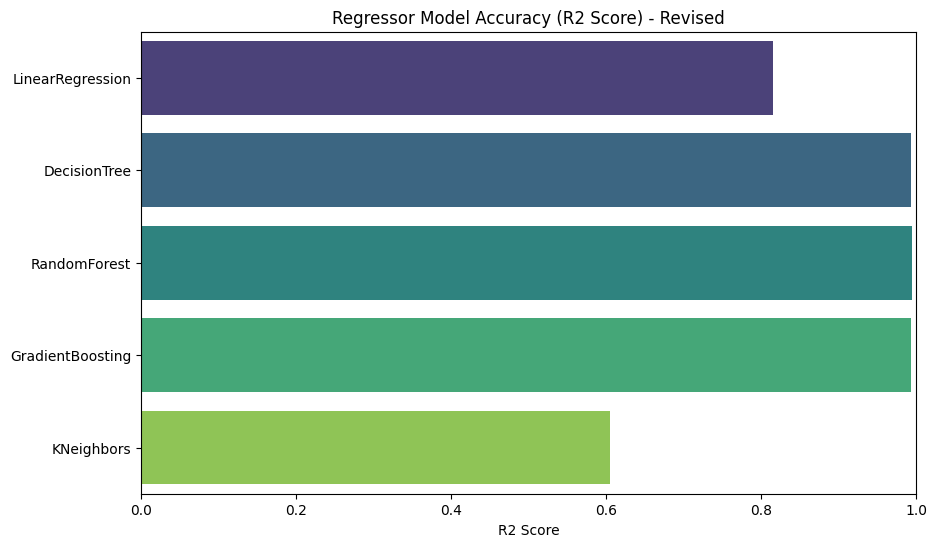

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results2.values()), y=list(results2.keys()), palette='viridis')
plt.xlabel('R2 Score')
plt.title('Regressor Model Accuracy (R2 Score) - Revised')
plt.xlim(0, 1)
plt.show()

### 6. Conclusion

As can be seen from the above plot, models performed significantly better after the addition of the new features, with three of our five models performing in the 99.33 - 99.45 range. Furthermore, the RandomForestRegressor model performed the best in this iteration with an R2 score of 99.44% (when rounded to two decimals). Therefore, we select it for our main model to be used in the final application. Finally, below we run the prediction again but this time seperately for the RandomForestRegressor model.

In [65]:
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train2, y_train2)

RandomForestRegressor(random_state=42)

In [66]:
y_predicted = np.round(random_forest_reg.predict(X_test2), 2)

#### Final Model Evaluation for RandomForestRegressor

In [67]:
accuracy = (y_predicted == y_test2).sum()/len(y_test2)
print("Accuracy of RandomForestRegressor calculated by hand:", np.round((accuracy * 100), 2), "%")

Accuracy of RandomForestRegressor calculated by hand: 93.39 %


In [68]:
score = r2_score(y_test2, y_predicted)
print("R2 Score of RandomForestRegressor:", np.round((score * 100), 2))

R2 Score of RandomForestRegressor: 99.44


In [69]:
error = np.sqrt(mean_squared_error(y_test2, y_predicted))
print("MSE for RandomForestRegressor:", np.round(error, 3))

MSE for RandomForestRegressor: 0.027
